# Getting the Data

In [1]:
import wrangle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = wrangle.get_training_data()

---Acquiring the Data---
rows: 91713, columns: 186


---Handling Missing Values---
Filling nulls with mode for the following features:
    * age
    * bmi
    * hospital_admit_source
Dropping features and patients with too many missing values
	 * Number of patients dropped: 173 
 	 * Number of features dropped:34


### Examining Age

Text(0, 0.5, '# of Patients')

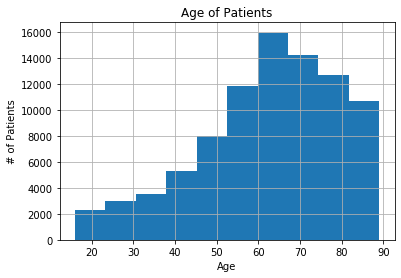

In [4]:
df.age.hist()
plt.title('Age of Patients')
plt.xlabel('Age')
plt.ylabel('# of Patients')

In [7]:
num_of_seniors = len(df[df.age > 59])
print('Percentage of ICU patients aged 60 or older:{: .2f}'.format(num_of_seniors / len(df)))

Percentage of ICU patients aged 60 or older: 0.58


In [8]:
no_age = df.age.isna().sum()
print(f'Number of patients without recorded ages: {no_age}')
print('Percentage of patients without recorded ages:{: .2f}'.format(no_age/ len(df)))

Number of patients without recorded ages: 4149
Percentage of patients without recorded ages: 0.05


Solution for Age: Fill with Mode

### BMI

Can we fill the missing values by calculating the BMI with the patient's height and weight?

Lets see if those values are recorded:

In [ ]:
# Masks
missing_bmi = all_data.bmi.isna() == True
has_weight  = all_data.weight.isna() == False
has_height  = all_data.height.isna() == False

In [ ]:
all_data[missing_bmi & has_weight & has_height]

In [ ]:
all_data.bmi.isna().sum()

In [ ]:
all_data.columns

In [ ]:
all_data.bmi.isna().sum()

In [ ]:
most_common_bmi = all_data.bmi.mode()
print(most_common_bmi)

In [ ]:
all_data.bmi.fillna(most_common_bmi, inplace=True)

Solution: Fill with mode

In [ ]:
all_data.isna().sum().sort_values(ascending=False)

### Hospital Admit Source

In [ ]:
all_data.hospital_admit_source.value_counts()

# Explore

## Broad Strokes of All the Data

In [ ]:
total_dead = df.hospital_death.sum()

In [ ]:
print("{:.2%}".format(total_dead/len(df)))

# Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

In [ ]:
new_df = df[['bmi',
             'age',
             'gender',
             'ethnicity',
             'hospital_death']]

In [ ]:
new_df.dropna(inplace=True)

In [ ]:
new_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
new_df.gender = encoder.fit_transform(new_df.gender)

In [ ]:
new_df.ethnicity = encoder.fit_transform(new_df.ethnicity)

In [ ]:
new_df.head()

In [ ]:
X = new_df.drop(columns='hospital_death')

In [ ]:
y = new_df.hospital_death

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state = 123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=345)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
tree.score(X_train, y_train)

In [ ]:
tree.score(X_test, y_test)

In [ ]:
tree.predict_proba(X)